# Completeness relation: some problematic cases

This notebook directly follows the `completeness_relation.ipynb` notebook, where the computation of the convergence of the completeness realtion as a function of the number of continuum states or of resonant couples included in the exact completeness relation (CR) and in the approximated Mittag-Leffler expansion (MLE), respectively.

We saw that the MLE of the CR follows the exact CR. However, this is not always the case, and we'll see that it actually depends on the test function. 

## Initialization: create a large basis set of Siegert states

In order to have a clearer view on that problem, this requires larger basis sets. Knowing that finding the Siegert states is the most time-consuming operation, a binary file named `siegerts.dat` and containing such a large basis set is provided for convenience. 

This large basis set was obtained by applying the `find_Siegert_states` class method with a large value for `re_k_max`, and it was written to a binary file by applying the `write` method to it, with the name of the file as a parameter:

```
# Find the Siegert states
siegerts = SWPBasisSet.find_Siegert_states(SWPotential(4.442882938158366, 10), 200, 1, 3)
# Write the basis set in a file named siegerts.dat
siegerts.write("siegerts.dat")
```

These lines created the `siegerts.dat` binary file that can then be read (these operations use the [pickle](https://docs.python.org/3/library/pickle.html) module).

### Import useful classes

In [1]:
# Make the notebook aware of some classes of the SiegPy module
from siegpy import SWPBasisSet, Rectangular

### Read the Siegert states to create a larger basis set of Siegert states

The binary file is read using the `from_file` class method of the `SWPBasisSet` class.

In [2]:
siegerts_large = SWPBasisSet.from_file('siegerts.dat')
l = siegerts_large.potential.width

## Case 1: Large, centered, rectangular test functions

When the centered test function becomes large compared to the width of the potential, the MLE of the CR no longer follows the exact result. It is easy to show that fact by plotting the convergence of the CR for multiple rectangular functions of increasing width.

To that end, `a_over_l` is the ratio of the width of the rectangular ($a$) test function to the potential width ($l$). A loop over some values of this parameter allows to create large rectangular test functions that are then used to plot the convergence of the completeness relation:

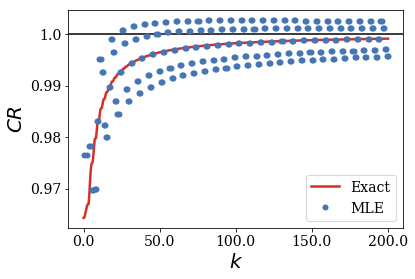

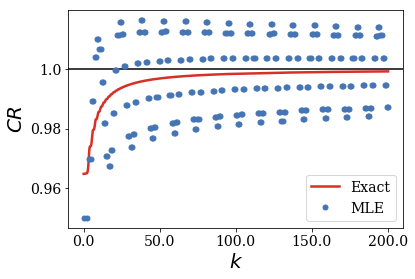

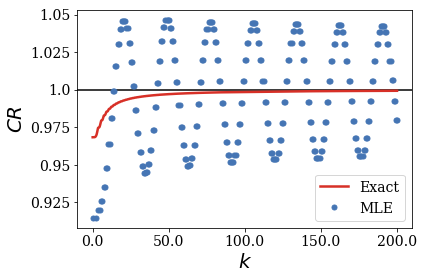

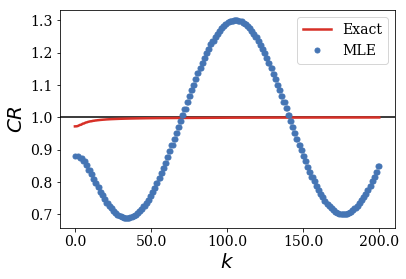

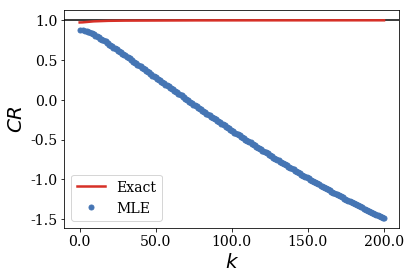

In [3]:
x_c = 0
for a_over_l in [0.8, 0.9, 0.95, 0.99, 0.999]:
    large_rect = Rectangular.from_width_and_center(a_over_l*l, x_c)
    siegerts_large.plot_completeness_convergence(large_rect)

When the centered rectangular test function gets close to the width of the potential, the MLE of the CR oscillates around the exact CR. The amplitude of these oscillations increses while their frequency decrases as the width of the test functions gets larger.

For the smallest rectangular test functions, the amplitudes of the oscillations seem to decrease for increasing wavenumbers: one can conjecture that the MLE of the CR still converges to the exact value of 1, if given a large enough number of Siegert states (this number increasing when the test function gets larger, or actually closer to the border of region $II$, as shown in the next section).

## Case 2: Non-centered rectangular test functions getting closer to the border of region $II$

What was observed in the previous case is also seen for test functions that are not as large as the previous ones, but that come close to the border of region $II$ instead. 

This time, the width of the test function is kept constant, while its center is moved away from the center of region $II$. For a given width, there is a maximal value $x_{c, max}$ for the test function to remain in region $II$. The ratio $x_c / x_{c, max}$ is therefore the parameter that is varied to create the different test functions.

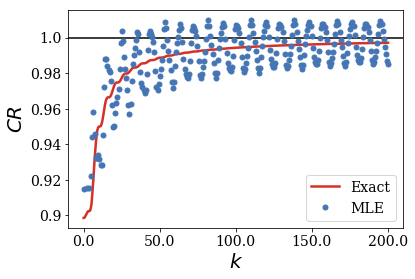

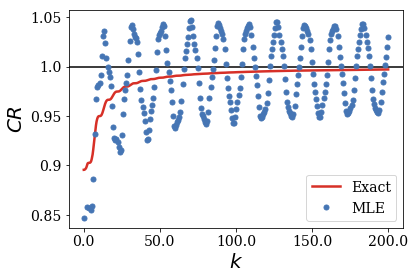

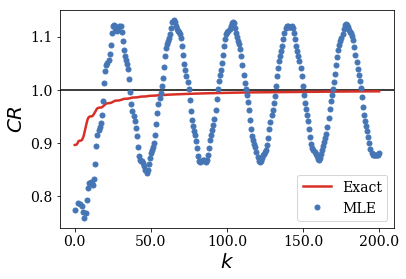

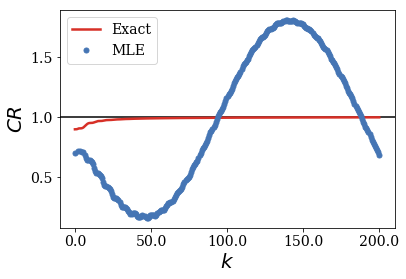

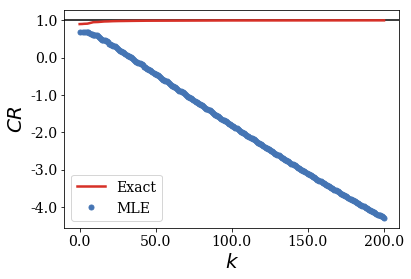

In [4]:
a = l / 4.
x_c_max = (l - a) / 2
for x_c_ratio in [0.8, 0.9, 0.95, 0.99, 0.999]:
    rect = Rectangular.from_width_and_center(a, x_c_ratio*x_c_max)
    siegerts_large.plot_completeness_convergence(rect)
    # Uncomment the following lines to compare the exact CR obtained using
    # the different test functions:
    #k_grid, cr = siegerts_large.exact_completeness_convergence(rect, hk=0.1, kmax=20)
    #print(cr)

The pattern of the convergence is more complex for uncentered test functions, but it keeps a similar behavior: the convergence of the MLE of the CR to the exact result is more difficult to reach as long as the rectangular test function gets closer to the border of region $II$, even for a test function that provides a good convergence of the CR when centered in region $II$.

**Explanation:**

You may notice that the convergence of the exact CR is not greatly modified by the value of the center of the rectangular test function. ***How can the MLE of the CR be so different as long as the test function gets closer to the border while the exact convergence of the CR does not vary?*** 

This observation actually gives a clue: remember (from the previous notebook) that the continuum states anti-nodes have constant amplitudes in region $II$ because their wavenumber is real, whereas resonant states have complex wavenumbers, leading to anti-nodes of increasing amplitude closer to the border of region $II$. Also remember that the amplitude of the anti-nodes close to the border of region $II$ gets even larger for the highest resonances.

Therefore, while the position of a test function of a given width may not have a large influence on the scalar products with the continuum states, the scalar product between the test function and the resonant states is clearly more dependent on that test function center, this influence being more critical as the test function gets close to the border of region $II$. From that, one understands why the worst case scenario regarding the convergence of the MLE of the CR is that of a thin test function close to the border of region $II$.